In [1]:
from model.dcgan import DCGAN
from model.anogan import AnoGAN

import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras import Sequential, Model
from tensorflow.keras.layers import Conv2D, LeakyReLU, Flatten, Dense, Reshape, Conv2DTranspose, Input, MaxPool2D, UpSampling2D, BatchNormalization, Activation, Dropout, ZeroPadding2D
%matplotlib inline

In [55]:
EPOCHS = 500
NOISE_DIM = 100

In [3]:
TRAIN_PATH = r"C:\Users\filip\Desktop\Universita\Laboratorio di Intelligenza Artificiale\hazelnut\train"
TEST_PATH = r"C:\Users\filip\Desktop\Universita\Laboratorio di Intelligenza Artificiale\hazelnut\test"
training_set = tf.keras.utils.image_dataset_from_directory(TRAIN_PATH, image_size = (64, 64), batch_size = 17)
test_set = tf.keras.utils.image_dataset_from_directory(TEST_PATH, image_size = (64, 64))

normalization_layer = tf.keras.layers.Rescaling(scale = (1./127.5), offset = -1)

normalized_training_set = training_set.map(lambda x, y: (normalization_layer(x), y))
normalized_test_set = test_set.map(lambda x, y: (normalization_layer(x), y))

Found 391 files belonging to 1 classes.
Found 110 files belonging to 5 classes.


In [4]:
gan = DCGAN()

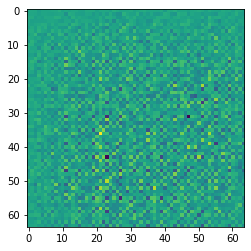

In [5]:
img = gan.generator(tf.random.normal([1,100]))

plt.imshow(img[0, :, :, 0])
plt.show()

In [6]:
print(gan.discriminator(img))

tf.Tensor([[0.0002063]], shape=(1, 1), dtype=float32)


In [71]:
#Train
gan.restore()
disc_loss, gen_loss = gan.train(normalized_training_set, EPOCHS)

Epoch 1  -  Generator Loss: 3.214	Discriminator Loss: 1.254
Epoch 2  -  Generator Loss: 3.618	Discriminator Loss: 1.222
Epoch 3  -  Generator Loss: 3.631	Discriminator Loss: 1.380
Epoch 4  -  Generator Loss: 4.484	Discriminator Loss: 1.431
Epoch 5  -  Generator Loss: 4.305	Discriminator Loss: 1.020
Epoch 6  -  Generator Loss: 2.743	Discriminator Loss: 3.147
Epoch 7  -  Generator Loss: 3.554	Discriminator Loss: 2.439
Epoch 8  -  Generator Loss: 4.239	Discriminator Loss: 0.837
Epoch 9  -  Generator Loss: 2.622	Discriminator Loss: 2.207
Epoch 10  -  Generator Loss: 2.881	Discriminator Loss: 2.014
Epoch 11  -  Generator Loss: 3.142	Discriminator Loss: 1.458
Epoch 12  -  Generator Loss: 3.020	Discriminator Loss: 1.273
Epoch 13  -  Generator Loss: 3.554	Discriminator Loss: 1.430
Epoch 14  -  Generator Loss: 4.133	Discriminator Loss: 0.955
Epoch 15  -  Generator Loss: 3.697	Discriminator Loss: 1.449
Epoch 16  -  Generator Loss: 5.632	Discriminator Loss: 0.768
Epoch 17  -  Generator Loss: 4.19

Epoch 135  -  Generator Loss: 4.075	Discriminator Loss: 1.290
Epoch 136  -  Generator Loss: 3.952	Discriminator Loss: 1.185
Epoch 137  -  Generator Loss: 3.691	Discriminator Loss: 1.103
Epoch 138  -  Generator Loss: 3.475	Discriminator Loss: 0.990
Epoch 139  -  Generator Loss: 3.269	Discriminator Loss: 1.104
Epoch 140  -  Generator Loss: 2.986	Discriminator Loss: 1.407
Epoch 141  -  Generator Loss: 4.032	Discriminator Loss: 0.958
Epoch 142  -  Generator Loss: 3.904	Discriminator Loss: 0.951
Epoch 143  -  Generator Loss: 3.554	Discriminator Loss: 1.257
Epoch 144  -  Generator Loss: 3.841	Discriminator Loss: 0.976
Epoch 145  -  Generator Loss: 3.910	Discriminator Loss: 0.758
Epoch 146  -  Generator Loss: 3.773	Discriminator Loss: 0.892
Epoch 147  -  Generator Loss: 3.721	Discriminator Loss: 0.974
Epoch 148  -  Generator Loss: 3.552	Discriminator Loss: 0.997
Epoch 149  -  Generator Loss: 3.344	Discriminator Loss: 0.995
Epoch 150  -  Generator Loss: 4.348	Discriminator Loss: 0.882
Epoch 15

Epoch 267  -  Generator Loss: 3.797	Discriminator Loss: 1.043
Epoch 268  -  Generator Loss: 3.770	Discriminator Loss: 1.104
Epoch 269  -  Generator Loss: 6.204	Discriminator Loss: 1.173
Epoch 270  -  Generator Loss: 5.980	Discriminator Loss: 0.478
Epoch 271  -  Generator Loss: 5.383	Discriminator Loss: 0.856
Epoch 272  -  Generator Loss: 4.441	Discriminator Loss: 1.125
Epoch 273  -  Generator Loss: 4.363	Discriminator Loss: 1.593
Epoch 274  -  Generator Loss: 4.280	Discriminator Loss: 0.966
Epoch 275  -  Generator Loss: 4.262	Discriminator Loss: 0.965
Epoch 276  -  Generator Loss: 3.966	Discriminator Loss: 1.116
Epoch 277  -  Generator Loss: 3.528	Discriminator Loss: 1.176
Epoch 278  -  Generator Loss: 4.072	Discriminator Loss: 0.728
Epoch 279  -  Generator Loss: 4.098	Discriminator Loss: 1.160
Epoch 280  -  Generator Loss: 3.944	Discriminator Loss: 0.922
Epoch 281  -  Generator Loss: 3.810	Discriminator Loss: 0.914
Epoch 282  -  Generator Loss: 3.793	Discriminator Loss: 1.071
Epoch 28

Epoch 399  -  Generator Loss: 5.589	Discriminator Loss: 0.775
Epoch 400  -  Generator Loss: 4.760	Discriminator Loss: 1.005
Epoch 401  -  Generator Loss: 5.704	Discriminator Loss: 0.783
Epoch 402  -  Generator Loss: 5.920	Discriminator Loss: 0.565
Epoch 403  -  Generator Loss: 5.240	Discriminator Loss: 0.605
Epoch 404  -  Generator Loss: 5.094	Discriminator Loss: 0.736
Epoch 405  -  Generator Loss: 5.063	Discriminator Loss: 0.722
Epoch 406  -  Generator Loss: 5.974	Discriminator Loss: 0.459
Epoch 407  -  Generator Loss: 5.087	Discriminator Loss: 0.629
Epoch 408  -  Generator Loss: 4.159	Discriminator Loss: 0.995
Epoch 409  -  Generator Loss: 4.717	Discriminator Loss: 1.330
Epoch 410  -  Generator Loss: 4.830	Discriminator Loss: 0.858
Epoch 411  -  Generator Loss: 4.336	Discriminator Loss: 0.877
Epoch 412  -  Generator Loss: 4.034	Discriminator Loss: 0.847
Epoch 413  -  Generator Loss: 4.302	Discriminator Loss: 0.908
Epoch 414  -  Generator Loss: 3.967	Discriminator Loss: 1.005
Epoch 41

In [7]:
gan.restore()

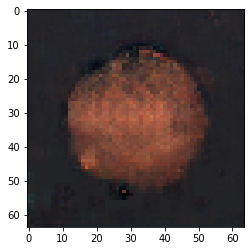

In [76]:
generated_img = gan.generator(tf.random.normal([1, 100]))
i = np.array((generated_img[0] * 127.5) + 127.5 , np.int32)
plt.imshow(i)
plt.show()

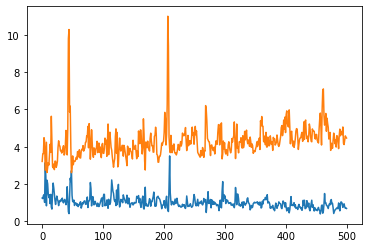

In [77]:
plt.plot(disc_loss)
plt.plot(gen_loss)
plt.show()

In [78]:
anogan = AnoGAN(gan)

In [79]:
test_image = []
for images, labels in normalized_test_set:
    for i in range(1):
        test_image = images[i].numpy()
    break
test_image = np.array([test_image])
anomaly_score, similar_img = anogan.compute_anomaly_score(test_image)

1/1 [==============================] - 0s 143ms/step


In [80]:
print(anomaly_score)

2689.33203125


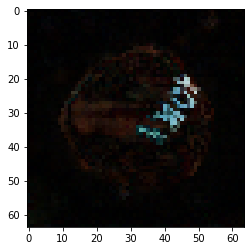

In [81]:
t = np.array((test_image[0] * 127.5) + 127.5, np.int32)
s = np.array((similar_img[0] * 127.5) + 127.5, np.int32)
plt.imshow(abs(t-s))
plt.show()

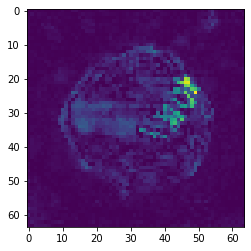

In [85]:
plt.imshow(abs(similar_img[0, :, :, 0]-test_image[0, : ,: ,0]))

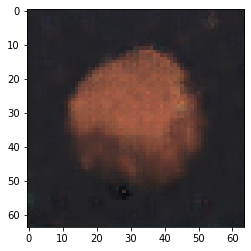

In [84]:
plt.imshow(s, cmap="Accent_r")